## Lesson 5. Customize Dates on Time Series Plots in Python Using Matplotlib

Use **DateFormatter** module to format dates

In [1]:
import os
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import seaborn as sns
import pandas as pd
import earthpy as et

In [2]:
# Handle datetime conversions betweeen pandas and matplotlib
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [3]:
# Use white grid plot background from seaborn
sns.set(font_scale=1.5, style='whitegrid')

In [4]:
data_path = et.data.get_data('colorado-flood')

In [5]:
file_path = os.path.join(data_path, 'precipitation', '805325-precip-dailysum-2003-2013.csv')

In [6]:
precip_2003_2013_daily = pd.read_csv(file_path,
                                     parse_dates=['DATE'],
                                     index_col=['DATE'],
                                     na_values=['999.99'])
precip_2003_2013_daily.head()

,DAILY_PRECIP,STATION,STATION_NAME,ELEVATION,LATITUDE,LONGITUDE,YEAR,JULIAN
DATE,,,,,,,,
2003-01-01,0.0,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,2003,1
2003-01-05,NaN,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,2003,5
2003-02-01,0.0,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,2003,32
2003-02-02,NaN,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,2003,33
2003-02-03,0.4,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,2003,34


In [7]:
precip_jun_aug_2005 = precip_2003_2013_daily['2005-06-01':'2005-08-31']
precip_jun_aug_2005.head()

,DAILY_PRECIP,STATION,STATION_NAME,ELEVATION,LATITUDE,LONGITUDE,YEAR,JULIAN
DATE,,,,,,,,
2005-06-01,0.0,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,2005,152
2005-06-02,0.1,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,2005,153
2005-06-03,0.3,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,2005,154
2005-06-04,0.7,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,2005,155
2005-06-09,0.1,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,2005,160


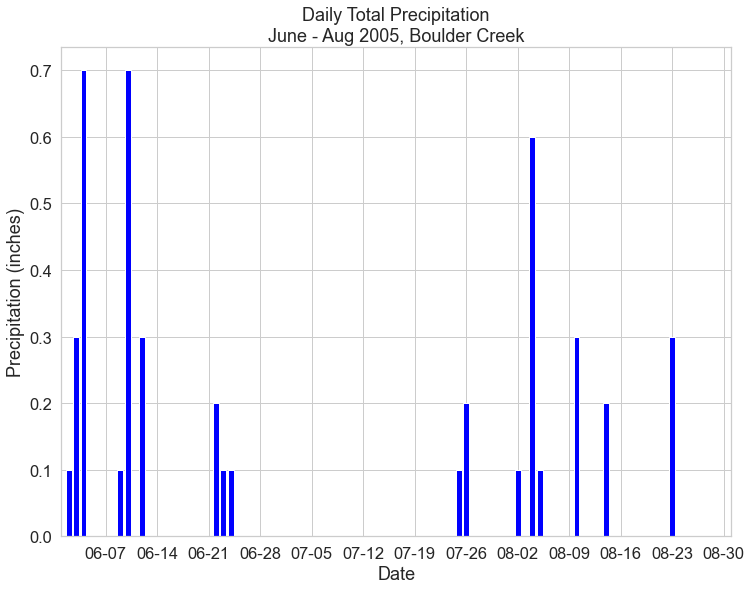

In [8]:
f, ax = plt.subplots(figsize=(12,9))
ax.bar(precip_jun_aug_2005.index.values,
       precip_jun_aug_2005['DAILY_PRECIP'],
       color='blue')
ax.set(xlabel='Date',
       ylabel='Precipitation (inches)',
       title='Daily Total Precipitation\nJune - Aug 2005, Boulder Creek',
       xlim=["2005-06-01", "2005-08-31"])

date_form = DateFormatter('%m-%d')
ax.xaxis.set_major_formatter(date_form)
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))
ax.xaxis.set_minor_locator(mdates.DayLocator()) # Not rendered as Seaborn turns minor ticks off

plt.setp(ax1.get_xtick_labels())
plt.show()

Use **DateFormatter** to reformat labels

#### Practice Time Series Skills

In [10]:
precip_aug_nov_2012 = precip_2003_2013_daily['2012-08-01':'2012-11-01']
precip_aug_nov_2013 = precip_2003_2013_daily['2013-08-01':'2013-11-01']

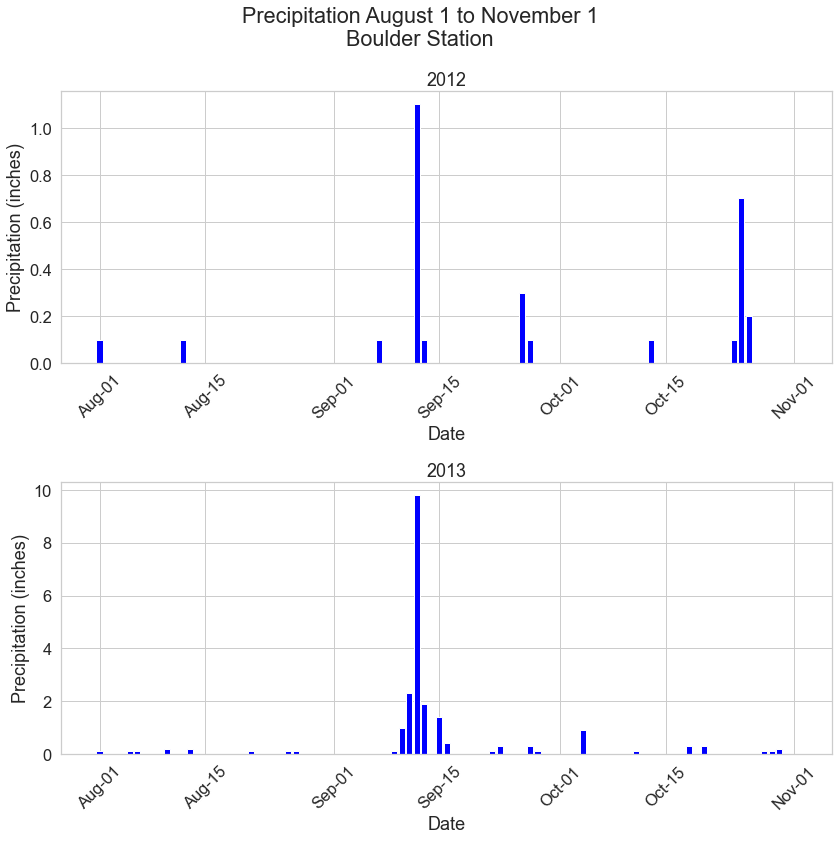

In [26]:
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(12,12))
f.suptitle('Precipitation August 1 to November 1\nBoulder Station')
plt.xticks(rotation=45)
date_form = DateFormatter('%b-%d')

ax1.bar(precip_aug_nov_2012.index.values,
        precip_aug_nov_2012['DAILY_PRECIP'],
        color='blue')
ax1.set(xlabel='Date',
        ylabel='Precipitation (inches)',
        title='2012')
ax1.tick_params('x', labelrotation=45)
ax1.xaxis.set_major_formatter(date_form)

ax2.bar(precip_aug_nov_2013.index.values,
        precip_aug_nov_2013['DAILY_PRECIP'],
        color='blue')
ax2.set(xlabel='Date',
        ylabel='Precipitation (inches)',
        title='2013')
ax2.tick_params('x', labelrotation=45)
ax2.xaxis.set_major_formatter(date_form)

f.tight_layout()

plt.show()